In [20]:
import data_prep as dp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing danych

Pliki matches.csv oraz standings.cvs zostały wstępnie przygotowane przy pomocy csv_prep.py 

In [11]:
matches = pd.read_csv("Datasets/matches.csv")
standings = pd.read_csv("Datasets/standings.csv")

matches['Date'] = pd.to_datetime(matches['Date'], dayfirst=True) #ten sam format dat
processed_matches = pd.DataFrame(columns=['Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HomeGoals', 'AwayGoals',
                                 'HTR', 'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'StandingDiff', 'HomeWins', 'AwayWins',
                                 'HomeDraws', 'AwayDraws', 'HomeHalfTimeWins', 'AwayHalfTimeWins', 'HomeHalfTimeDraws',
                                 'AwayHalfTimeDraws', 'HomeAvgGoals', 'AwayAvgGoals', 'HomeAvgHalftimeGoals', 'AwayAvgHalftimeGoals',
                                 'HomeAvgShots', 'AwayAvgShots', 'HomeAvgShotsOnTarget', 'AwayAvgShotsOnTarget'
                                ])

processed_matches = matches.apply(lambda row: dp.get_match_stats(row, matches, standings, amount=5), axis=1)
processed_matches = pd.DataFrame(processed_matches.tolist())
processed_matches.to_csv("Datasets/processed_matches.csv", index=False)

## Analiza danych

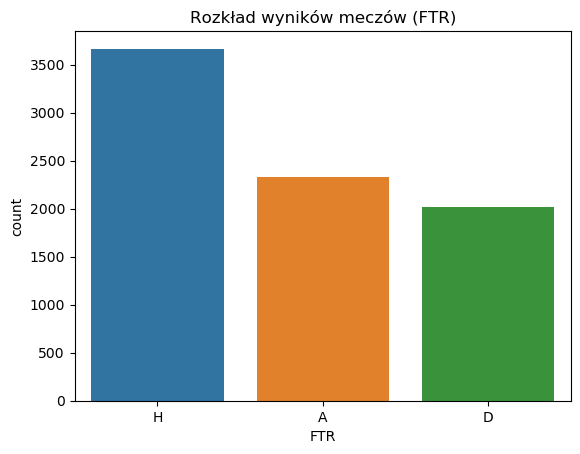

In [27]:
sns.countplot(x='FTR', data=processed_matches)
plt.title('Rozkład wyników meczów (FTR)')
plt.show()

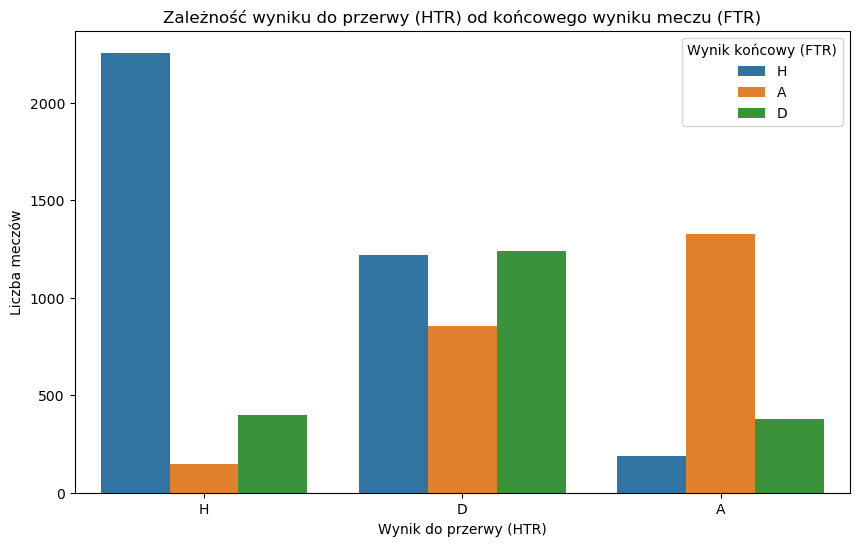

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='HTR', hue='FTR', data=processed_matches)
plt.title('Zależność wyniku do przerwy (HTR) od końcowego wyniku meczu (FTR)')
plt.xlabel('Wynik do przerwy (HTR)')
plt.ylabel('Liczba meczów')
plt.legend(title='Wynik końcowy (FTR)')
plt.show()

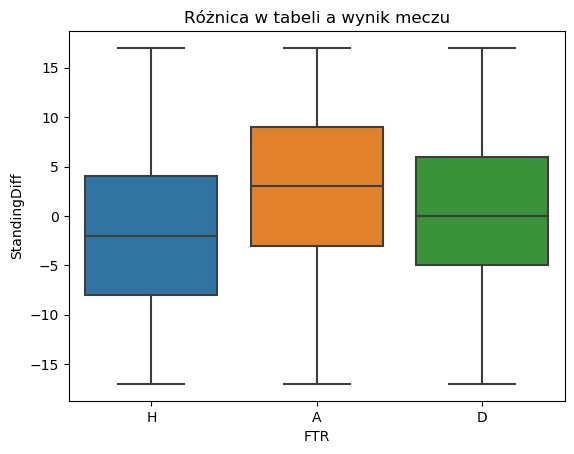

In [30]:
sns.boxplot(x='FTR', y='StandingDiff', data=processed_matches)
plt.title('Różnica w tabeli a wynik meczu')
plt.show()

Przeanalizujmy ważność poszczególnych cech

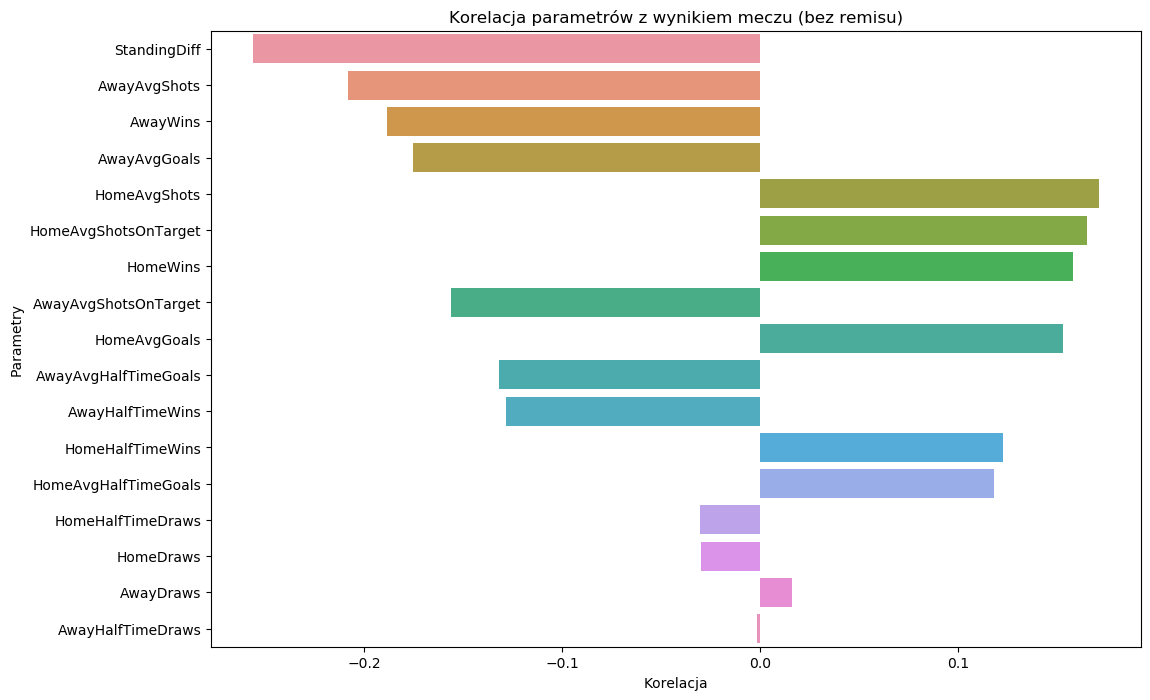

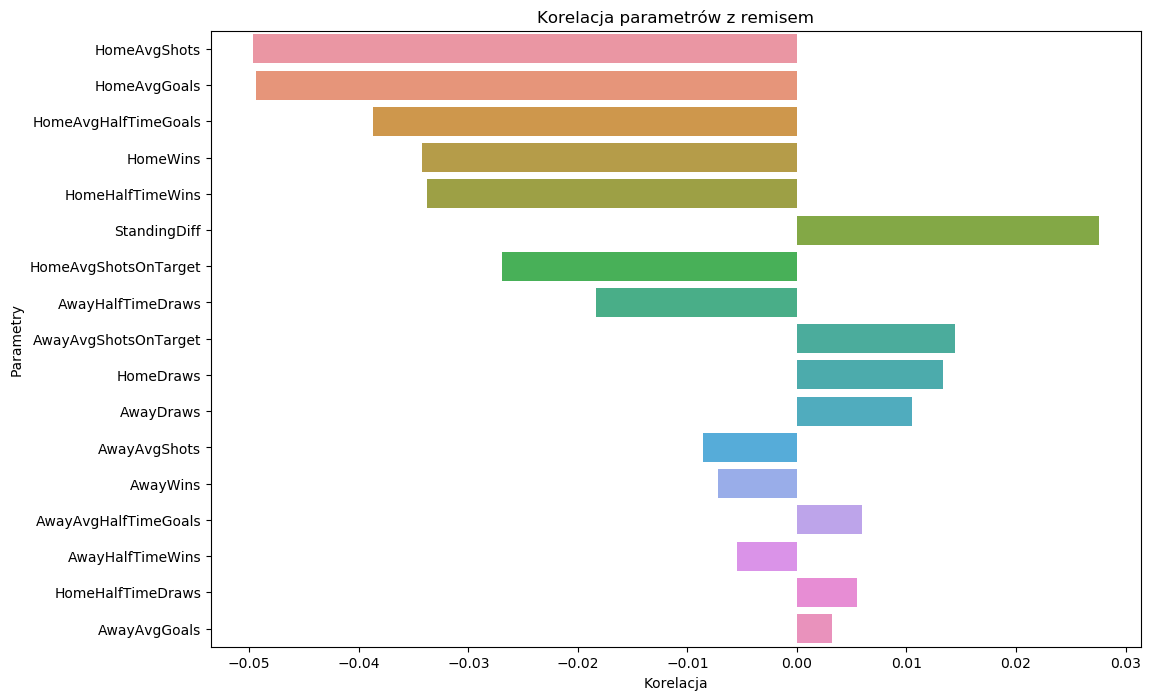

In [55]:
processed_matches = pd.read_csv("Datasets/processed_matches.csv")

ftr_mapping = {'H': 1, 'D': 0, 'A': -1}
processed_matches['FTR'] = processed_matches['FTR'].map(ftr_mapping)

X = processed_matches.drop(columns=['Season', 'Date', 'HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals', 'HalfTimeHomeGoals', 'HalfTimeAwayGoals'])
y = processed_matches['FTR']

correlation_matrix = X.corr()
ftr_correlation = correlation_matrix['FTR'].drop('FTR')
ftr_correlation = ftr_correlation.reindex(ftr_correlation.abs().sort_values(ascending=False).index)

plt.figure(figsize=(12, 8))
sns.barplot(x=ftr_correlation.values, y=ftr_correlation.index)
plt.title('Korelacja parametrów z wynikiem meczu (bez remisu)')
plt.xlabel('Korelacja')
plt.ylabel('Parametry')
plt.show()

processed_matches['IsDraw'] = (processed_matches['FTR'] == 0).astype(int)

X = processed_matches.drop(columns=['Season', 'Date', 'HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals', 'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'FTR'])
y = processed_matches['IsDraw']

correlation_matrix = X.corr()
draw_correlation = correlation_matrix['IsDraw'].drop('IsDraw')
draw_correlation = draw_correlation.reindex(draw_correlation.abs().sort_values(ascending=False).index)

plt.figure(figsize=(12, 8))
sns.barplot(x=draw_correlation.values, y=draw_correlation.index)
plt.title('Korelacja parametrów z remisem')
plt.xlabel('Korelacja')
plt.ylabel('Parametry')
plt.show()

## Testowanie modeli

In [13]:
def generate_train_val_test_sets():
    pass

In [14]:
#swtorzyc zbior treningowy i testowy (moze walidacyjny, testowy z 2-3 ostatnich sezonow)
#dropnac pierwsza kolejke?